``Title``: Diabetes Prediction of Women 

``Introduction``:
According to the World Health Organization, 422 million people worldwide suffer from diabetes. Increases in weight and blood pressure significantly raise the risk of diabetes. 

Research Question: Does a female with average BMI(25) and blood glucose level(140mm/dL) have diabetes?

Our data will come from the Diabetes Dataset obtained from Kaggle. It provides information on the BMI, plasma glucose concentration, and diabetes conditions of females.

In [3]:
library(tidyverse)
library(tidymodels)

In [4]:
set.seed(1)

Data is read into R

In [5]:
data <- read_csv("diabetes.csv") 
data

Parsed with column specification:
cols(
  Pregnancies = col_double(),
  Glucose = col_double(),
  BloodPressure = col_double(),
  SkinThickness = col_double(),
  Insulin = col_double(),
  BMI = col_double(),
  DiabetesPedigreeFunction = col_double(),
  Age = col_double(),
  Outcome = col_double()
)



Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1    6          148     72            35              0     33.6
2    1           85     66            29              0     26.6
3    8          183     64             0              0     23.3
4    1           89     66            23             94     28.1
5    0          137     40            35            168     43.1
6    5          116     74             0              0     25.6
7    3           78     50            32             88     31.0
8   10          115      0             0              0     35.3
9    2          197     70            45            543     30.5
10   8          125     96             0              0      0.0
11   4          110     92             0              0     37.6
12  10          168     74             0              0     38.0
13  10          139     80             0              0     27.1
14   1          189     60            23            846     30.1
15   5          166     72            19            175     25.8
16   7          100      0             0              0     30.0
17   0          118     84            47            230     45.8
18   7          107     74             0              0     29.6
19   1          103     30            38             83     43.3
20   1          115     70            30             96     34.6
21   3          126     88            41            235     39.3
22   8           99     84             0              0     35.4
23   7          196     90             0              0     39.8
24   9          119     80            35              0     29.0
25  11          143     94            33            146     36.6
26  10          125     70            26            115     31.1
27   7          147     76             0              0     39.4
28   1           97     66            15            140     23.2
29  13          145     82            19            110     22.2
30   5          117     92             0              0     34.1
⋮   ⋮           ⋮       ⋮             ⋮             ⋮       ⋮   
739  2           99     60            17            160     36.6
740  1          102     74             0              0     39.5
741 11          120     80            37            150     42.3
742  3          102     44            20             94     30.8
743  1          109     58            18            116     28.5
744  9          140     94             0              0     32.7
745 13          153     88            37            140     40.6
746 12          100     84            33            105     30.0
747  1          147     94            41              0     49.3
748  1           81     74            41             57     46.3
749  3          187     70            22            200     36.4
750  6          162     62             0              0     24.3
751  4          136     70             0              0     31.2
752  1          121     78            39             74     39.0
753  3          108     62            24              0     26.0
754  0          181     88            44            510     43.3
755  8          154     78            32              0     32.4
756  1          128     88            39            110     36.5
757  7          137     90            41              0     32.0
758  0          123     72             0              0     36.3
759  1          106     76             0              0     37.5
760  6          190     92             0              0     35.5
761  2           88     58            26             16     28.4
762  9          170     74            31              0     44.0
763  9           89     62             0              0     22.5
764 10          101     76            48            180     32.9
765  2          122     70            27              0     36.8
766  5          121     72            23            112     26.2
767  1          126     60             0              0     30.1
768  1           93     70            3

The BMI and glucose columns are filteres to eliminate outliers. The BMI, Glucose, and Outcome columns are selected because only BMI and glucose will be used as variables to predict the outcome. 

In [6]:
diabetes_data<-data%>%
filter(BMI>20&BMI<60)%>%
filter(Glucose>30)%>%
select(BMI,Glucose,Outcome)%>%
mutate(Outcome=as_factor(Outcome))
diabetes_data

BMI  Glucose Outcome
1   33.6 148     1      
2   26.6  85     0      
3   23.3 183     1      
4   28.1  89     0      
5   43.1 137     1      
6   25.6 116     0      
7   31.0  78     1      
8   35.3 115     0      
9   30.5 197     1      
10  37.6 110     0      
11  38.0 168     1      
12  27.1 139     0      
13  30.1 189     1      
14  25.8 166     1      
15  30.0 100     1      
16  45.8 118     1      
17  29.6 107     1      
18  43.3 103     0      
19  34.6 115     1      
20  39.3 126     0      
21  35.4  99     0      
22  39.8 196     1      
23  29.0 119     1      
24  36.6 143     1      
25  31.1 125     1      
26  39.4 147     1      
27  23.2  97     0      
28  22.2 145     0      
29  34.1 117     0      
30  36.0 109     0      
⋮   ⋮    ⋮       ⋮      
708 36.6  99     0      
709 39.5 102     1      
710 42.3 120     1      
711 30.8 102     0      
712 28.5 109     0      
713 32.7 140     1      
714 40.6 153     0      
715 30.0 100     0      
716 49.3 147     1      
717 46.3  81     0      
718 36.4 187     1      
719 24.3 162     1      
720 31.2 136     1      
721 39.0 121     0      
722 26.0 108     0      
723 43.3 181     1      
724 32.4 154     1      
725 36.5 128     1      
726 32.0 137     0      
727 36.3 123     1      
728 37.5 106     0      
729 35.5 190     1      
730 28.4  88     0      
731 44.0 170     1      
732 22.5  89     0      
733 32.9 101     0      
734 36.8 122     0      
735 26.2 121     0      
736 30.1 126     1      
737 30.4  93     0

75% of our data is used for training while 25% is used for testing

In [7]:
diabetes_split<-initial_split(diabetes_data,prop=0.75,strata=Outcome)
diabetes_train<-training(diabetes_split)
diabetes_test<-testing(diabetes_split)
diabetes_train
diabetes_test

BMI  Glucose Outcome
1   26.6  85     0      
2   23.3 183     1      
3   28.1  89     0      
4   43.1 137     1      
5   25.6 116     0      
6   31.0  78     1      
7   35.3 115     0      
8   30.5 197     1      
9   37.6 110     0      
10  38.0 168     1      
11  27.1 139     0      
12  30.1 189     1      
13  25.8 166     1      
14  45.8 118     1      
15  29.6 107     1      
16  43.3 103     0      
17  34.6 115     1      
18  39.3 126     0      
19  35.4  99     0      
20  39.8 196     1      
21  29.0 119     1      
22  36.6 143     1      
23  23.2  97     0      
24  22.2 145     0      
25  34.1 117     0      
26  31.6 158     1      
27  27.6 122     0      
28  24.0 103     0      
29  33.2 138     0      
30  37.1 111     1      
⋮   ⋮    ⋮       ⋮      
525 22.9 175     0      
526 30.1  92     0      
527 28.4 130     1      
528 44.5 174     1      
529 23.3 105     0      
530 35.4  95     0      
531 27.4 126     0      
532 32.0  65     0      
533 39.5 102     1      
534 42.3 120     1      
535 30.8 102     0      
536 32.7 140     1      
537 49.3 147     1      
538 46.3  81     0      
539 36.4 187     1      
540 24.3 162     1      
541 31.2 136     1      
542 39.0 121     0      
543 43.3 181     1      
544 32.4 154     1      
545 36.5 128     1      
546 32.0 137     0      
547 37.5 106     0      
548 35.5 190     1      
549 28.4  88     0      
550 44.0 170     1      
551 32.9 101     0      
552 26.2 121     0      
553 30.1 126     1      
554 30.4  93     0

BMI  Glucose Outcome
1   33.6 148     1      
2   30.0 100     1      
3   31.1 125     1      
4   39.4 147     1      
5   36.0 109     0      
6   24.8  88     0      
7   32.9 102     1      
8   38.2  90     1      
9   22.7 106     0      
10  29.7 146     0      
11  24.2 101     0      
12  24.4  88     0      
13  40.5 146     0      
14  32.8 114     1      
15  29.0  99     0      
16  32.5 109     1      
17  43.4 126     1      
18  35.1 129     0      
19  32.6  62     0      
20  37.7  95     0      
21  22.4 113     0      
22  24.6 101     0      
23  32.4 110     0      
24  26.5 107     0      
25  24.7 142     0      
26  39.0 163     1      
27  34.0 155     1      
28  31.2  89     0      
29  34.0 124     1      
30  53.2 162     1      
⋮   ⋮    ⋮       ⋮      
154 38.9 120     0      
155 33.7 115     1      
156 34.8 112     0      
157 27.5 111     1      
158 25.4  99     0      
159 57.3 123     0      
160 35.6  91     0      
161 24.2 101     0      
162 24.2  56     0      
163 46.1 144     1      
164 24.6 107     0      
165 29.9 169     1      
166 44.5 118     0      
167 27.6 125     1      
168 35.0 168     1      
169 34.4 127     0      
170 32.8 164     1      
171 38.0  93     1      
172 23.1  94     0      
173 32.4 141     0      
174 28.4 120     1      
175 29.0 106     0      
176 36.6  99     0      
177 28.5 109     0      
178 40.6 153     0      
179 30.0 100     0      
180 26.0 108     0      
181 36.3 123     1      
182 22.5  89     0      
183 36.8 122     0

Means of predictor variables are obtained to see where the center of training data is. Because the mean values of BMI and Glucose are very different from each other, we know that the training dataset needs to be scaled.

In [8]:
table_diabetes_train<- diabetes_train %>%
summarize(across(BMI:Glucose,mean))
table_diabetes_train

BMI      Glucose 
1 32.93592 123.5487

Percentage of diabetic and non-diabetic coutomes in diabetes_train was obtained to determine the value of our majority classifier.

In [9]:
tables2_diabetes_train<-diabetes_train%>%
group_by(Outcome)%>%
summarize(n=n())%>%
mutate(percent=100*n/nrow(diabetes_train))
tables2_diabetes_train

`summarise()` ungrouping output (override with `.groups` argument)



Outcome n   percent 
1 0       356 64.25993
2 1       198 35.74007

Unscaled raw data of the training set is plotted out to see overall distribution of points. 

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

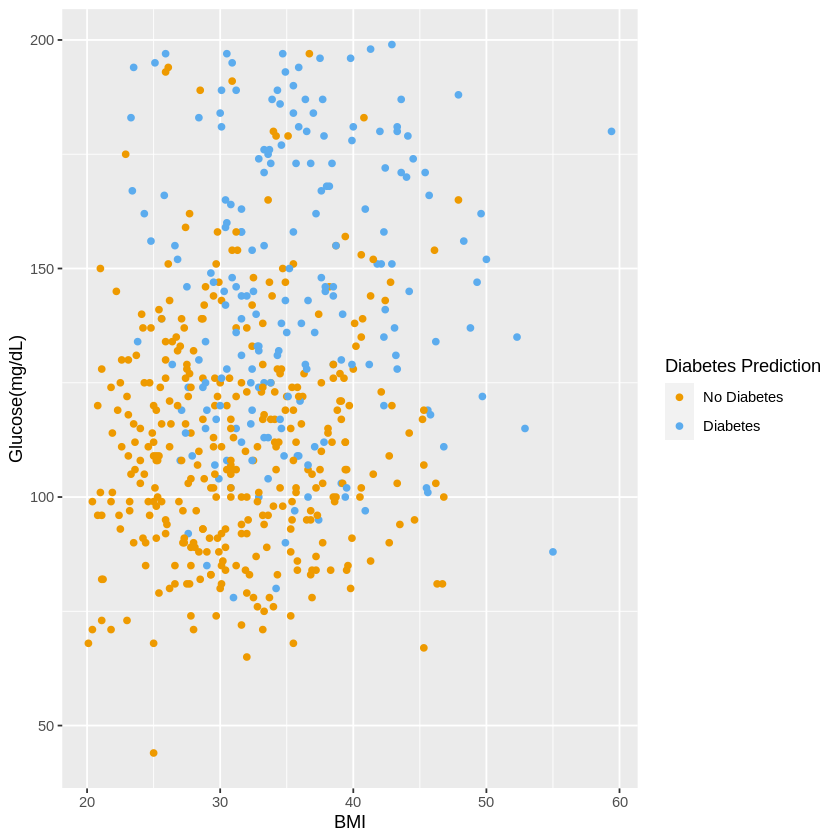

In [10]:
options(repr.width.plot = 20,repr.height.plot = 20)

diabetes_train_plot<-diabetes_train%>%
ggplot(aes(x=BMI,y=Glucose,color=Outcome))+
geom_point()+
labs(x="BMI",y="Glucose(mg/dL)",color="Diabetes Prediction") +
scale_color_manual(labels = c("No Diabetes", "Diabetes"), 
                     values = c("orange2", "steelblue2"))
theme(text = element_text(size = 20))

diabetes_train_plot


``Methods``:
Predictor Variables: To predict whether a female will have diabetes, BMI and plasma glucose will be used as predictor variables.BMI is a good predictor of diabetes because our bodies become resistant to insulin as more fatty tissues develop, leading to diabetes. Plasma glucose level is a good predictor of diabetes because people with diabetes have low insulin levels, leading to glucose build-up in the body. 

Data Analysis: A 5-fold-cross-validation will be performed on the scaled training set and the value of k will be selected based on accuracy. K-nearest neighbours classification will be used to predict if a female with BMI of 25 and glucose level of 140mm/dL will have diabetes. 

Visualisation: A scatterplot will be created with BMI on the x-axis and plasma glucose level on the y-axis. Points of the scatter plot will be colored to differentiate between patients who have diabetes and patients who don’t. 

 
``Expectations``:
We expect to find that a female average BMI(25) and plasma glucose concentration (140mm/dL) will not have diabetes. Our study can show the importance of maintaining a normal BMI and plasma glucose level on the health of females worldwide. Future studies can find the relationship between diabetes and other factors, such as age, blood pressure, and exercise.


The training set is scaled to make values comparable. 

In [11]:
diabetes_recipe<-recipe(Outcome~BMI+Glucose,data = diabetes_train) %>%
                       step_center(all_predictors()) %>%
                       step_scale(all_predictors())%>%
                        prep()
diabetes_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Training data contained 554 data points and no missing data.

Operations:

Centering for BMI, Glucose [trained]
Scaling for BMI, Glucose [trained]

In [12]:
scaled_diabetes_train<-bake(diabetes_recipe,diabetes_train)
scaled_diabetes_train

BMI          Glucose     Outcome
1   -0.95104386  -1.22903206 0      
2   -1.44638541   1.89545794 1      
3   -0.72588861  -1.10150185 0      
4    1.52566391   0.42886060 1      
5   -1.10114736  -0.24067298 0      
6   -0.29058846  -1.45220991 1      
7    0.35485660  -0.27255553 0      
8   -0.36564021   2.34181366 1      
9    0.70009465  -0.43196828 0      
10   0.76013605   1.41721968 1      
11  -0.87599211   0.49262570 0      
12  -0.42568161   2.08675325 1      
13  -1.07112666   1.35345458 1      
14   1.93094336  -0.17690787 1      
15  -0.50073336  -0.52761593 1      
16   1.55568461  -0.65514614 0      
17   0.24978415  -0.27255553 1      
18   0.95527060   0.07815253 0      
19   0.36986695  -0.78267634 0      
20   1.03032235   2.30993111 1      
21  -0.59079546  -0.14502532 1      
22   0.54999115   0.62015590 1      
23  -1.46139576  -0.84644144 0      
24  -1.61149927   0.68392100 0      
25   0.17473240  -0.20879042 0      
26  -0.20052636   1.09839417 1      
27  -0.80094036  -0.04937767 0      
28  -1.34131296  -0.65514614 0      
29   0.03963925   0.46074315 0      
30   0.62504290  -0.40008573 1      
⋮   ⋮            ⋮           ⋮      
525 -1.506426815  1.64039753 0      
526 -0.425681607 -1.00585420 0      
527 -0.680857559  0.20568274 1      
528  1.735808807  1.60851498 1      
529 -1.446385414 -0.59138104 0      
530  0.369866948 -0.91020655 0      
531 -0.830961060  0.07815253 0      
532 -0.140484955 -1.86668308 0      
533  0.985291302 -0.68702869 1      
534  1.405581105 -0.11314277 1      
535 -0.320609157 -0.68702869 0      
536 -0.035412505  0.52450825 1      
537  2.456305612  0.74768611 1      
538  2.005995109 -1.35656226 0      
539  0.519970449  2.02298815 1      
540 -1.296281913  1.22592437 1      
541 -0.260567756  0.39697805 1      
542  0.910239552 -0.08126022 0      
543  1.555684606  1.83169284 1      
544 -0.080443555  0.97086396 1      
545  0.534980799  0.14191764 1      
546 -0.140484955  0.42886060 0      
547  0.685084300 -0.55949849 0      
548  0.384877298  2.11863580 1      
549 -0.680857559 -1.13338440 0      
550  1.660757057  1.48098478 1      
551 -0.005391804 -0.71891124 0      
552 -1.011085261 -0.08126022 0      
553 -0.425681607  0.07815253 1      
554 -0.380650557 -0.97397165 0

The scaled training set is plotted as a way to visualize our model's data. 

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

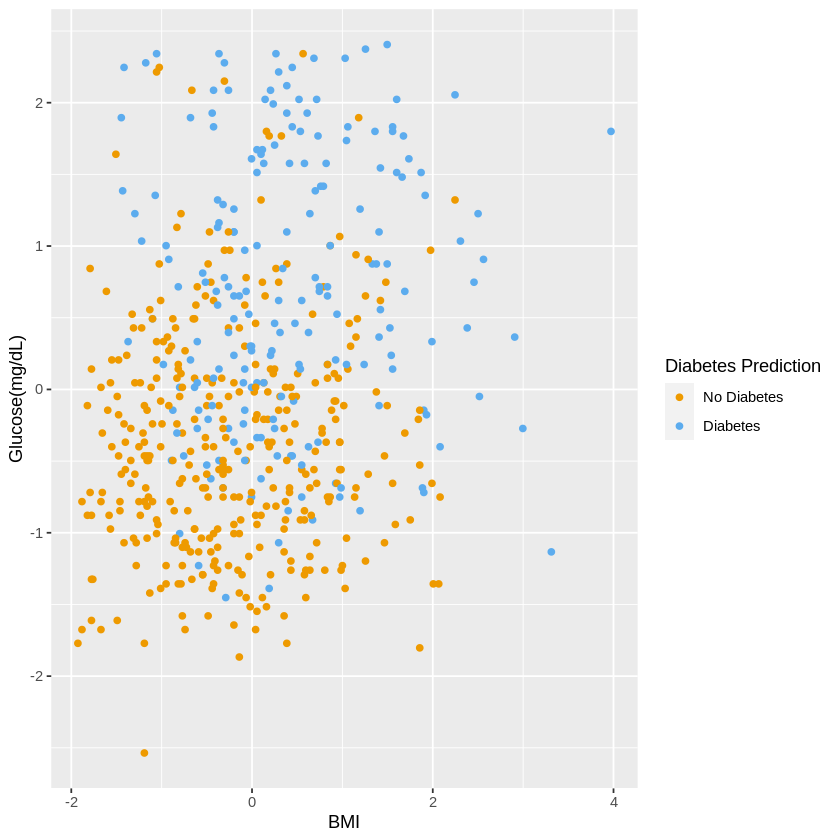

In [55]:
options(repr.width.plot = 50,repr.height.plot = 30)
plot_scaled_diabetes_train<-scaled_diabetes_train%>%
ggplot(aes(x=BMI,y=Glucose,color=Outcome))+
geom_point()+
labs(x="BMI",y="Glucose(mg/dL)",color="Diabetes Prediction") +
scale_color_manual(labels = c("No Diabetes", "Diabetes"), 
                     values = c("orange2", "steelblue2"))
theme(text = element_text(size = 20))

plot_scaled_diabetes_train

A 5-fold-cross-validation is performed.

In [14]:
diabetes_vfold<-vfold_cv(diabetes_train,v=5,strata=Outcome)


knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() %>%
  add_recipe(diabetes_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = diabetes_vfold, grid = k_vals) %>%
  collect_metrics()


A plot comparing estimated accuracy and number of neighbors is created, so we can see which K values have highest accuracy.

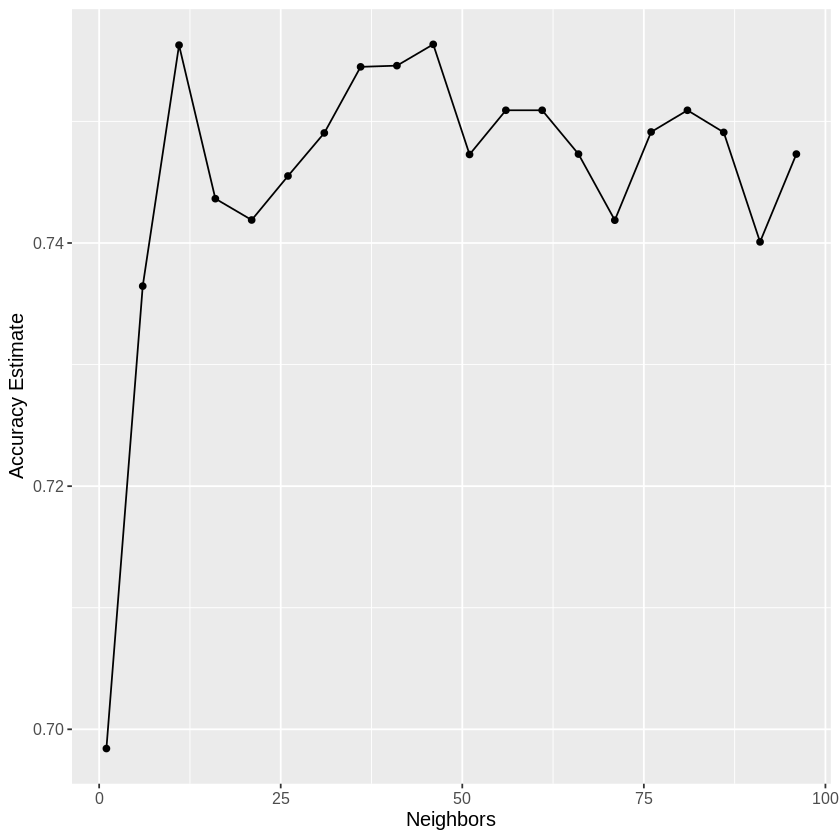

In [15]:
accuracies <- knn_results %>%
  filter(.metric == "accuracy")
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

Estimated accuracies are listed from highest to lowest, and the slice function was used to obtain the K value with the highest one. We chose 36 as our K value since it has highest estimated accuracy.

In [16]:
k_value <- arrange(accuracies,desc(mean)) %>%
          slice(1)
k_value

neighbors .metric  .estimator mean      n std_err     .config
1 46        accuracy binary     0.7563391 5 0.007909046 Model10

The classifier built from the training set is used to predict labels in the test set.

In [19]:


knn_spec<-nearest_neighbor(weight_func="rectangular",neighbors=36)%>%
set_engine("kknn")%>%
set_mode("classification")

knn_fit<-workflow()%>%
add_recipe(diabetes_recipe)%>%
add_model(knn_spec)%>%
fit(diabetes_train) 
diabetes_test_predictions<-predict(knn_fit,diabetes_test)%>%
bind_cols(diabetes_test)

diabetes_test_predictions

.pred_class BMI  Glucose Outcome
1   1           33.6 148     1      
2   0           30.0 100     1      
3   1           31.1 125     1      
4   1           39.4 147     1      
5   0           36.0 109     0      
6   0           24.8  88     0      
7   0           32.9 102     1      
8   0           38.2  90     1      
9   0           22.7 106     0      
10  0           29.7 146     0      
11  0           24.2 101     0      
12  0           24.4  88     0      
13  1           40.5 146     0      
14  0           32.8 114     1      
15  0           29.0  99     0      
16  0           32.5 109     1      
17  0           43.4 126     1      
18  0           35.1 129     0      
19  0           32.6  62     0      
20  0           37.7  95     0      
21  0           22.4 113     0      
22  0           24.6 101     0      
23  0           32.4 110     0      
24  0           26.5 107     0      
25  0           24.7 142     0      
26  1           39.0 163     1      
27  1           34.0 155     1      
28  0           31.2  89     0      
29  0           34.0 124     1      
30  1           53.2 162     1      
⋮   ⋮           ⋮    ⋮       ⋮      
154 0           38.9 120     0      
155 0           33.7 115     1      
156 0           34.8 112     0      
157 0           27.5 111     1      
158 0           25.4  99     0      
159 1           57.3 123     0      
160 0           35.6  91     0      
161 0           24.2 101     0      
162 0           24.2  56     0      
163 1           46.1 144     1      
164 0           24.6 107     0      
165 1           29.9 169     1      
166 0           44.5 118     0      
167 0           27.6 125     1      
168 1           35.0 168     1      
169 0           34.4 127     0      
170 1           32.8 164     1      
171 0           38.0  93     1      
172 0           23.1  94     0      
173 1           32.4 141     0      
174 0           28.4 120     1      
175 0           29.0 106     0      
176 0           36.6  99     0      
177 0           28.5 109     0      
178 1           40.6 153     0      
179 0           30.0 100     0      
180 0           26.0 108     0      
181 0           36.3 123     1      
182 0           22.5  89     0      
183 0           36.8 122     0

The accurcy is computed to get statistics about the quality of our model. Our model's accuracy is 72%, which is higher than our majority classifier (64%). This shows that our method is extracting some useful information from our predictor variables. 

In [20]:
diabetes_test_accuracy<-diabetes_test_predictions%>%
metrics(truth=Outcome,estimate=.pred_class)%>%
filter(.metric=="accuracy")

diabetes_test_accuracy

.metric  .estimator .estimate
1 accuracy binary     0.7213115

A confusion matrix is created to show the table of predicted lables and correct labels. The classifier labelled 16+35=51 mistakes, but this is relatively low compared to the number of correct predictions (102+30=132). 

In [21]:
confusion<-diabetes_test_predictions%>%
conf_mat(truth=Outcome,estimate=.pred_class)
confusion

          Truth
Prediction   0   1
         0 102  35
         1  16  30

We plotted two graphs, one showing labels from testing set, and another showing predictions from the training set to compare the two in a visual way. As shown by the two graphs, the distribution of orange (no diabetes) and blue (diabetes) points are generally the same. This suggests our model does a fairly good job performing classification. 

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

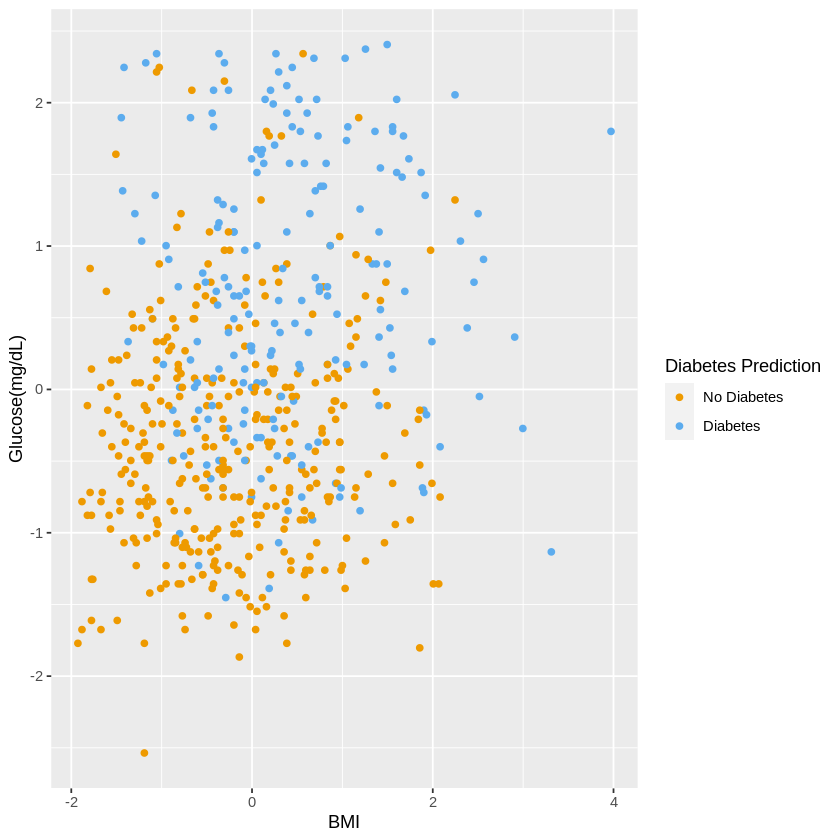

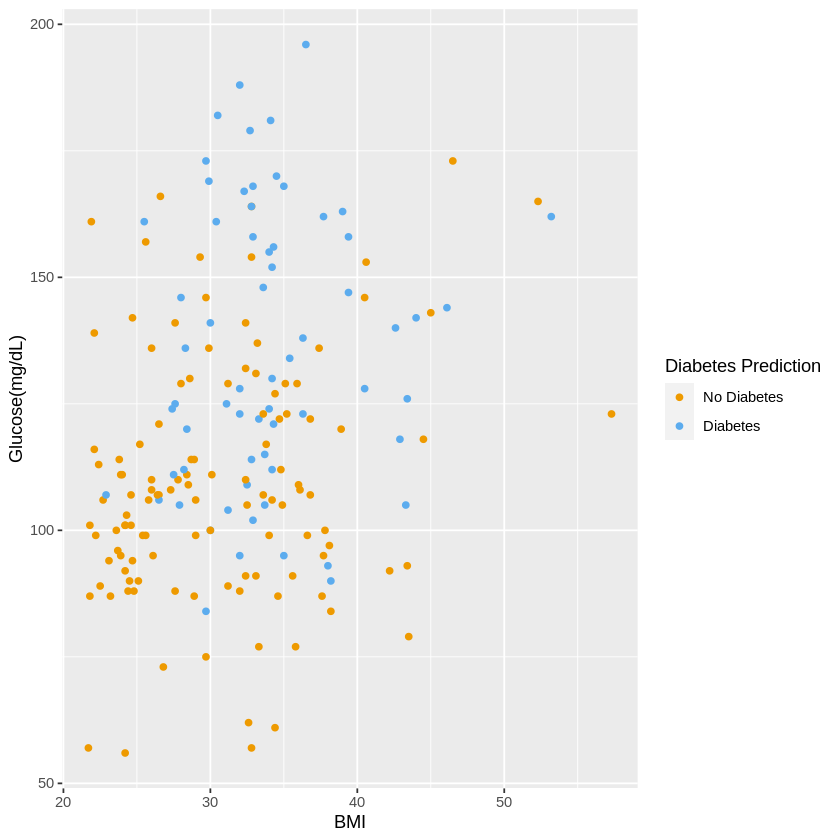

In [63]:
options(repr.width.plot = 50,repr.height.plot = 30)
plot_scaled_diabetes_train<-scaled_diabetes_train%>%
ggplot(aes(x=BMI,y=Glucose,color=Outcome))+
geom_point()+
labs(x="BMI",y="Glucose(mg/dL)",color="Diabetes Prediction") +
scale_color_manual(labels = c("No Diabetes", "Diabetes"), 
                     values = c("orange2", "steelblue2"))
theme(text = element_text(size = 20))

plot_scaled_diabetes_train

plot_labels_versus_prediction <- diabetes_test_predictions %>%
                                  ggplot(aes(x = BMI, y = Glucose,color = Outcome)) +
                                  geom_point() +
                                  labs(x="BMI",y="Glucose(mg/dL)",color="Diabetes Prediction") +
scale_color_manual(labels = c("No Diabetes", "Diabetes"), 
                     values = c("orange2", "steelblue2"))
theme(text = element_text(size = 20))
plot_labels_versus_prediction

Our model is used to predict our unknown point of BMI=25 and Glucose=140. 

In [ ]:
new_obs<-tibble(BMI=25,Glucose=140)
predict(knn_fit,new_obs)

Discussion:

Our model predicts that a female with average BMI=25 and normal plasma glucose level=140mm/dL does not have diabetes. We are fairly confident in this prediction because our model's accuracy (72%) is higher than the majority classifier (64%) This suggests our model can be considered as a relatively useful model in classifying women as diabetic or non-diabetic. Furthermore, our predictor variables are reliable sources to predict diabetes according to medical articles. 

We did expect a female with BMI=25 and glucose=140mm/dL to be non-diabetic, because we predicted that people with normal BMI and glucose levels are generally healthy and didn't experience resistance to insulin, reducing their chance of being diabetic.

The findings of this study shows the majority of women with healthy weight and glucose level are classified as non-diabetic. Therefore, maintaining a normal BMI by exercising and controlling glucose level by eating healthy food can contribute to the prevention of diabetes in females. Our study provides statistical analysis on factors that lead to high diabetes risk, which can raise awareness on this issue. 

A weakness of our study is that only a 5-fold-cross-validation was performed due to computer limitations. It is better to use more train/validation splits to get a better estimate of accuracy, which will lead to a better choice of the number of neighbors. Future studies with more computer power can perform a 20-fold-cross-validation to choose a better K value.

It is important to note that we only predicted diabetes in women. The relationship between BMI, plasma glucose, and diabetes may be very different in men. Future studies can predict diabetes in males using BMI and plasma glucose. In addition, researchers can use other predictor variables to predict diabetes, such as age, diet, and blood pressure.

`Reference`

Source of Articles:

Haslam, D., 2010. Obesity and diabetes: the links and common approaches. Primary Care Diabetes, 4(2), pp.105-112.


Weinstein, A.R., et al. (2004) Relationship of Physical Activity vs. Body Mass Index (BMI) with Type 2 Diabetes in Women, American Medical Association (JAMA), 292(10) 1188-1194.


Mayoclinic.org. 2022. Diabetes - Diagnosis and treatment - Mayo Clinic. Available at: <https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451> [Accessed 21 June 2022].

Who.int. 2022. Diabetes. Available at: <https://www.who.int/health-topics/diabetes> [Accessed 21 June 2022].

Source of Dataset:

Kaggle.com. 2022. Diabetes Dataset. Available at: <https://www.kaggle.com/datasets/mathchi/diabetes-data-set> [Accessed 21 June 2022].